# This notebook performs general exploratory data analysis on the full news transcript texts of each news outlet

In [5]:
%run data_processing.ipynb

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Commjhub/jupyterhub/comm318_fall2019/jdlish/nltk_data
[nltk_data]     ...
[nltk_data]   Package vader_lexicon is already up-to-date!


### When did Fox and CNN first start to report about the coronavirus outbreak/pandemic?


In [6]:
print(sorted(data_cnn['full_date'])[1])
print(sorted(data_fox['full_date'])[1])

2020-01-18
2020-01-22


### How long are Fox and CNN news transcripts on average?

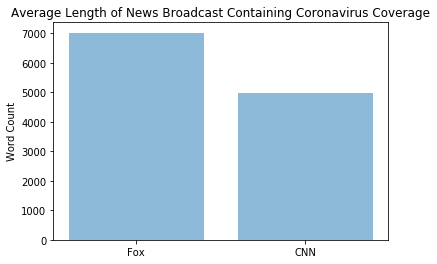

In [7]:
news_outlets = ('Fox', 'CNN')
y_pos = np.arange(len(news_outlets))
length = [round(mean(data_fox['word_count'])),round(mean(data_cnn['word_count']))]

plt.bar(y_pos, length, align='center', alpha=0.5)
plt.xticks(y_pos, news_outlets)
plt.ylabel('Word Count')
plt.title('Average Length of News Broadcast Containing Coronavirus Coverage')

plt.show()

In [8]:
print("The average length of a CNN news transcript is {} words".format(round(mean(data_cnn['word_count']))))
print("The average length of a Fox news transcript is {} words".format(round(mean(data_fox['word_count']))))
print("On average, Fox news broadcasts are {} % longer than CNN news broadcasts".format(round((((round(mean(data_fox['word_count']))/
                                                                                       round(mean(data_cnn['word_count'])))-1)*100)),2))


The average length of a CNN news transcript is 4957 words
The average length of a Fox news transcript is 7015 words
On average, Fox news broadcasts are 42 % longer than CNN news broadcasts


### The average length of a CNN news transcript is 4946 words while that of Fox is 6981 words. Fox news transcripts are 41% longer than CNN news transcripts on average. 

## Count and Visualize the Number of Broadcasts about coronavirus pandemic over time

### This could represent one key difference between the responses of Fox and CNN at a higher level. If Fox and CNN differ in the number of daily news broadcasts they have that cover the coronavirus, then this would represent a differentiating factor between the news outlet's coronavirus coverage. If one news outlet has significantly more daily broadcasts covering the coronavirus, it could be a preliminary indicator of the nature of that news outlet's response; more coverage per day over time could indicate that that news outlet had been more serious than another over time. 

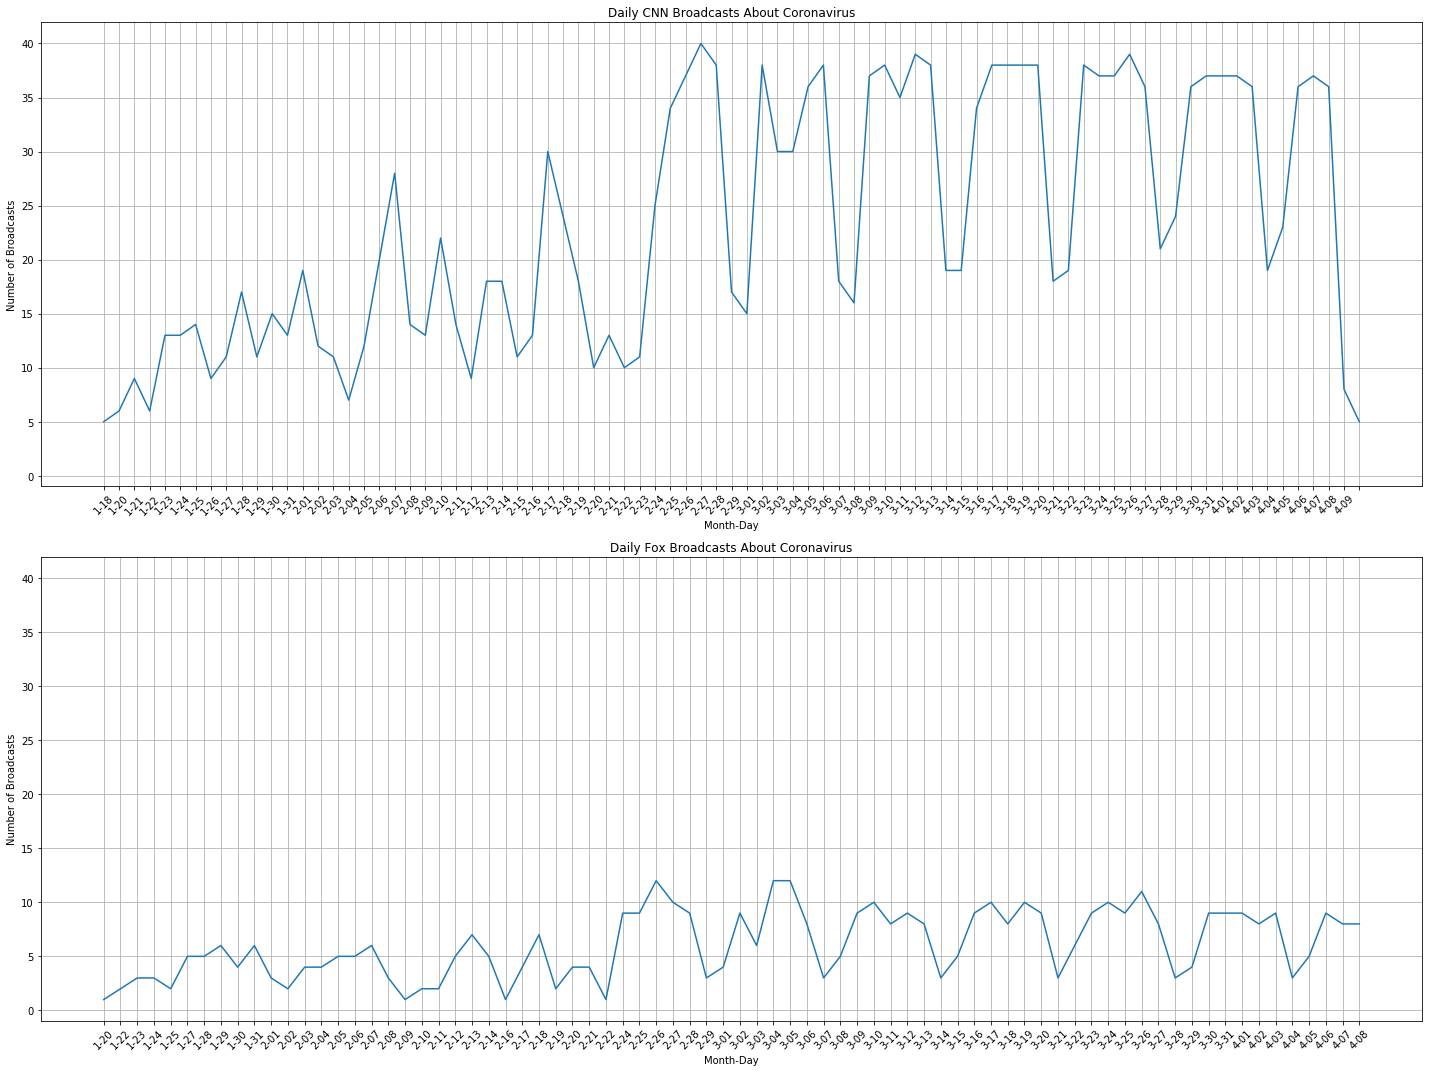

In [9]:
fig,(ax1, ax2) = plt.subplots(2,1,figsize=(20,15),sharey=True)
date_data_fox=pd.DataFrame(data_fox['full_date'].value_counts()).reset_index().sort_values('index')
date_data_cnn=pd.DataFrame(data_cnn['full_date'].value_counts()).reset_index().sort_values('index')
ax1.plot(date_data_cnn['index'],date_data_cnn['full_date'])
ax2.plot(date_data_fox['index'],date_data_fox['full_date'])
month_day_1=[]
for date in date_data_cnn['index']:
    month_day_1.append(date[6:])
ax1.set_xticks(date_data_cnn['index'])
ax1.set_xticklabels(month_day_1, rotation=45)
month_day_2=[]
for date in date_data_fox['index']:
    month_day_2.append(date[6:])
ax2.set_xticks(date_data_fox['index'])
ax2.set_xticklabels(month_day_2, rotation=45)

ax1.grid()
ax2.grid()
ax1.set_title('Daily CNN Broadcasts About Coronavirus')
ax1.set_xlabel("Month-Day")
ax1.set_ylabel("Number of Broadcasts")
ax2.set_title('Daily Fox Broadcasts About Coronavirus')
ax2.set_xlabel("Month-Day")
ax2.set_ylabel("Number of Broadcasts")
plt.tight_layout()

### It appears that CNN has been reporting about coronavirus much more than Fox has over time. CNN's daily number of news broadcasts covering coronavirus started at around 5 per day, and increased over time to range between approximately 15 per day to 40 per day. Fox's daily number of news broadcasts covering coronavirus hovered between approximately 0 and 5 per day before increasing to a range betweenn approximately 5-10 per day. Both Fox's and CNN's coverage appear to have spiked on February 22-23, with both news outlet's number of daily news broadcasts containing coronavirus coverage increasing tremendously. After this date, both news outlets covered coronavirus a lot more than they previously did, with CNN covering it a lot more than Fox did in terms of broadcasts per day covering the topic. 